CLUSTERING
DATASET : KM DATASET

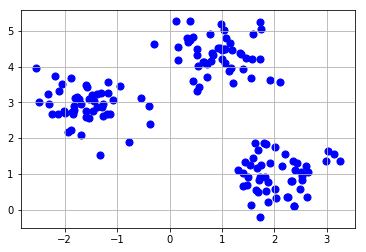

In [21]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='blue',marker='o',s=50)
plt.grid()
plt.show()

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

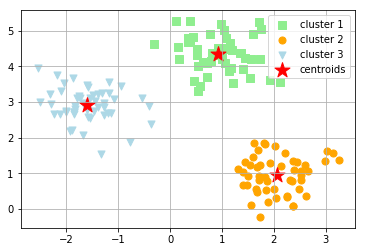

In [4]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],
X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [5]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


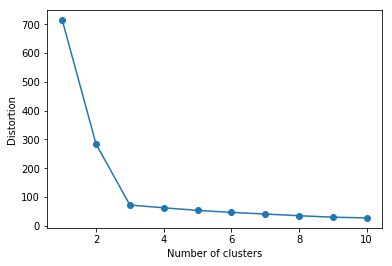

In [6]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

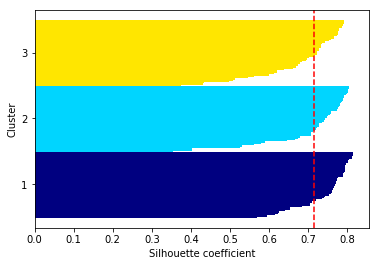

In [7]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

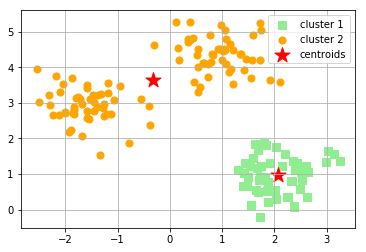

In [8]:
km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50, c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],
X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

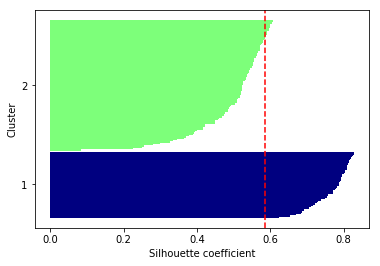

In [9]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [10]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [11]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [12]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [13]:
row_clusters = linkage(df.values,method='complete',metric='euclidean')
pd.DataFrame(row_clusters,columns=['row label 1','row label 2','distance','no. of items in clust.'],index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


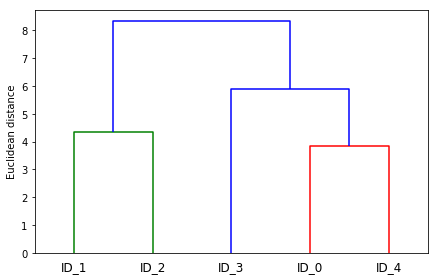

In [14]:
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters,labels=labels,
# make dendrogram black (part 2/2)
# color_threshold=np.inf
)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


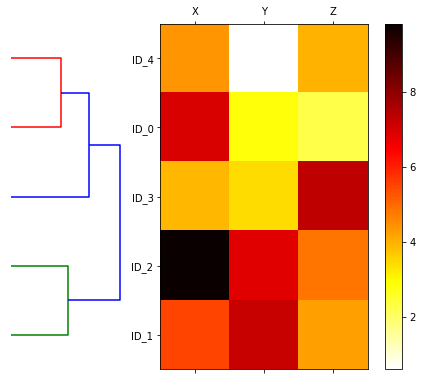

In [16]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='right')

df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


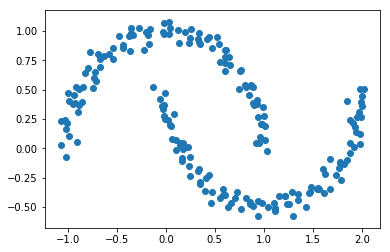

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

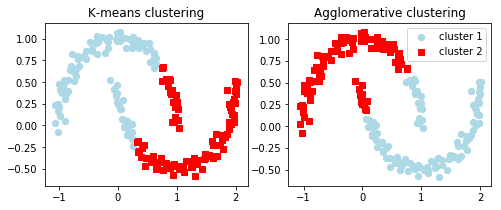

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],c='lightblue',marker='o',s=40,label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c='red',marker='s',s=40,label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],c='lightblue',marker='o',s=40,label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],c='red',marker='s',s=40,label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()                   

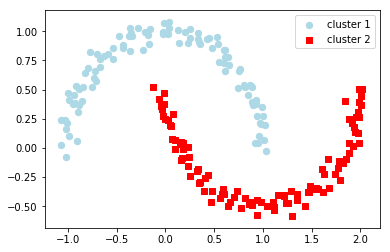

In [20]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],X[y_db==0,1],c='lightblue',marker='o',s=40,label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1],c='red',marker='s',s=40,label='cluster 2')
plt.legend()
plt.show()